# **ASL Alphabets Classification**

Training multiple Classifiers on 26 Alphabets pictures. For now, the model is being trained only on alphabets but later using this same approach we can train on words. After training, the best model will be used to actually predict on a real person signing alphabets. 

## **Our Approach**

- Acquire a Dataset of images signing alphabets.
- Perform Hand Landmarking on each video and we get angles data from the landmarks.
- Select only the relevant and important angles.
- Train different models such as Random Forest, KNN, Decision Tree.
- Evaluate the models and see which one is performing the best.

### **Step 1: Loading the dataset and reading the images**

Dataset is basically images of a person signing Alphabets. 

In [56]:
import cv2
import os

In [57]:
# Define the path to your ASL dataset
base_path = 'dataset/'

# List of ASL categories
asl_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
asl_categories = [char.lower() for char in asl_categories]


In [58]:
print(asl_categories)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### **Step 2: Performing Pose Estimation, extracting landmarks and calculating angles from the images**

In [4]:
%pip install mediapipe==0.10.1

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**NOTE:** You only need to do this once, if you do not have hand_landmarker.task. If you have this file, then simply place in the PythonI folder -> Lib folder -> site-packages folder. The path for me was D:/Software/PythonI/Lib/site-packages/ . After downloading, I simply place this file "hand_landmarker.task" in the folder on this path.

In [6]:
!curl -o hand_landmarker.task https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 34 7635k   34 2671k    0     0  2242k      0  0:00:03  0:00:01  0:00:02 2247k
 62 7635k   62 4735k    0     0  2221k      0  0:00:03  0:00:02  0:00:01 2224k
 83 7635k   83 6367k    0     0  2015k      0  0:00:03  0:00:03 --:--:-- 2017k
100 7635k  100 7635k    0     0  2092k      0  0:00:03  0:00:03 --:--:-- 2093k


In [59]:
import math

def get_angle(point1, point2, point3):
    """ Calculate angle between two lines """
    if(point1==(0,0) or point2==(0,0) or point3==(0,0)):
        return 0
    numerator = point2[1] * (point1[0] - point3[0]) + point1[1] * \
                (point3[0] - point2[0]) + point3[1] * (point2[0] - point1[0])
    denominator = (point2[0] - point1[0]) * (point1[0] - point3[0]) + \
                (point2[1] - point1[1]) * (point1[1] - point3[1])

    try:
        ang = math.atan(numerator/denominator)

        ang = ang * 180 / math.pi
        if ang < 0:
            ang = 180 + ang
        return ang
    except:
        return 90.0

In [60]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import os

def get_data(base_path, categories):

    base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
    options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
    detector = vision.HandLandmarker.create_from_options(options)

    angles_data = {}
    landmarks_data = {}

    for category in categories:
        category_path = os.path.join(base_path, category)
        category_angles = {}
        category_landmarks = {}

        image_num = 0

        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)

            image = mp.Image.create_from_file(image_path)

            results = detector.detect(image)

            hand_landmarks_list = results.hand_landmarks

            if hand_landmarks_list:
                image_landmarks = {}
                for idx in range(len(hand_landmarks_list)):
                    hand_landmarks = hand_landmarks_list[idx]

                    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
                    hand_landmarks_proto.landmark.extend([
                        landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
                    ])

                    for i, data_point in enumerate(hand_landmarks_proto.landmark):
                        image_landmarks[i] = (data_point.x, data_point.y)
                
                
                # These angles are calculated between two lines. The lines will have a landmark in common. 
                # These landmarks can be seen from the hand_landmarks.png image.
                # Getting angle between the two lines
                angle0 = get_angle(image_landmarks[4], image_landmarks[3], image_landmarks[2])
                angle1 = get_angle(image_landmarks[3], image_landmarks[2], image_landmarks[1])
                angle2 = get_angle(image_landmarks[2], image_landmarks[1], image_landmarks[0])
                angle3 = get_angle(image_landmarks[4], image_landmarks[0], image_landmarks[8])
                angle4 = get_angle(image_landmarks[8], image_landmarks[7], image_landmarks[6])
                angle5 = get_angle(image_landmarks[7], image_landmarks[6], image_landmarks[5])
                angle6 = get_angle(image_landmarks[6], image_landmarks[5], image_landmarks[0])
                angle7 = get_angle(image_landmarks[12], image_landmarks[11], image_landmarks[10])
                angle8 = get_angle(image_landmarks[11], image_landmarks[10], image_landmarks[9])
                angle9 = get_angle(image_landmarks[10], image_landmarks[9], image_landmarks[13])
                angle10 = get_angle(image_landmarks[16], image_landmarks[15], image_landmarks[14])
                angle11 = get_angle(image_landmarks[15], image_landmarks[14], image_landmarks[13])
                angle12 = get_angle(image_landmarks[14], image_landmarks[13], image_landmarks[17])
                angle13 = get_angle(image_landmarks[20], image_landmarks[19], image_landmarks[18])
                angle14 = get_angle(image_landmarks[19], image_landmarks[18], image_landmarks[17])
                angle15 = get_angle(image_landmarks[18], image_landmarks[17], image_landmarks[0])
                angle16 = get_angle(image_landmarks[5], image_landmarks[0], image_landmarks[17])
                angle17 = get_angle(image_landmarks[6], image_landmarks[5], image_landmarks[12])

                # Adding angles to the dictionary
                category_angles[image_num] = [angle0, angle1, angle2, angle3, angle4, angle5, angle6, angle7, angle8, angle9,
                                            angle10, angle11, angle12, angle13, angle14, angle15, angle16, angle17]
                
                # Adding landmarks to the dictionary
                category_landmarks[image_num] = image_landmarks
                
                image_num += 1

        angles_data[category] = category_angles
        landmarks_data[category] = category_landmarks

    return angles_data, landmarks_data


In [61]:
angles_data, landmarks_data = get_data(base_path, asl_categories)

In [62]:
print('Landmarks Data : ')
landmarks_data

Landmarks Data : 


{'a': {0: {0: (0.4829402565956116, 0.8909180164337158),
   1: (0.6634613275527954, 0.722244381904602),
   2: (0.7355992794036865, 0.4763977527618408),
   3: (0.7087298631668091, 0.28822779655456543),
   4: (0.6611076593399048, 0.1574735939502716),
   5: (0.7138673663139343, 0.4631880521774292),
   6: (0.6628465056419373, 0.31412118673324585),
   7: (0.6257600784301758, 0.29053425788879395),
   8: (0.6340286135673523, 0.2330634593963623),
   9: (0.578568696975708, 0.5159589648246765),
   10: (0.5135951638221741, 0.39730286598205566),
   11: (0.4744464159011841, 0.4000948667526245),
   12: (0.4990633726119995, 0.3265731632709503),
   13: (0.448078453540802, 0.5836328268051147),
   14: (0.37160956859588623, 0.4818745255470276),
   15: (0.35285958647727966, 0.4708443880081177),
   16: (0.3818560540676117, 0.3973662853240967),
   17: (0.33077794313430786, 0.644895613193512),
   18: (0.2662166655063629, 0.5471423864364624),
   19: (0.24805745482444763, 0.5111257433891296),
   20: (0.25819337

In [63]:
print('Angles Data : ')
angles_data

Angles Data : 


{'a': {0: [173.13475430918587,
   165.91898079663758,
   164.98988753725183,
   173.94437685754855,
   27.758645930101444,
   149.4920798060093,
   143.78255044832432,
   30.122028461392443,
   127.8654259224918,
   131.92331150539468,
   14.622273761718485,
   160.63912408327494,
   129.01453231786095,
   13.652077766580259,
   4.975020863999793,
   178.78538576938962,
   143.74015676036112,
   75.45322619412],
  1: [174.34736294920305,
   162.66213803891466,
   161.065688690342,
   178.65156675786426,
   171.47093779293232,
   46.80040871909418,
   153.4277037952428,
   173.70152339294287,
   142.24074790537412,
   146.13278405742818,
   173.12995813910447,
   174.98783108986268,
   145.33372693968232,
   172.66510370605468,
   177.4271383620467,
   10.57476523390032,
   132.62983419897463,
   151.63073933106398],
  2: [171.23266921214417,
   166.77578168825593,
   162.5982107804222,
   179.4228033300499,
   21.007246711603592,
   176.6556137563433,
   161.80826270502695,
   31.88648

### **Step 3: Exploratory Data Analysis (EDA) and Data Preprocessing**

#### **Creating a Dataframe from the angles and landmarks data**

In [12]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd

In [65]:
# Create a list to store the landmarks data
landmarks_list = []

# Iterate through each category
for category, images in landmarks_data.items():
    # Iterate through each image
    for _, landmarks in images.items():
        # Append category and landmarks to the landmarks list
        landmarks_flat = [coord for landmark in landmarks.values() for coord in landmark]
        landmarks_list.append(landmarks_flat + [category])

# Create column names for x and y coordinates of each landmark
columns = [f'Landmark {i}_X' for i in range(21)] + [f'Landmark {i}_Y' for i in range(21)] + ['Category']

# Create a DataFrame
landmarks_df = pd.DataFrame(landmarks_list, columns=columns)

landmarks_df


Landmark 0_X  Landmark 1_X  Landmark 2_X  Landmark 3_X  Landmark 4_X  \
0         0.482940      0.890918      0.663461      0.722244      0.735599   
1         0.399071      0.676137      0.601130      0.637831      0.755330   
2         0.490386      0.820169      0.688323      0.721105      0.801351   
3         0.467138      0.797416      0.679451      0.728355      0.785492   
4         0.434132      0.793964      0.652791      0.695143      0.763573   
...            ...           ...           ...           ...           ...   
1024      0.513409      0.774770      0.643764      0.690725      0.699296   
1025      0.521643      0.809573      0.624638      0.684549      0.656529   
1026      0.488097      0.816403      0.644810      0.696679      0.695600   
1027      0.454070      0.816067      0.620692      0.719738      0.709315   
1028      0.461806      0.801542      0.587353      0.748321      0.687908   

      Landmark 5_X  Landmark 6_X  Landmark 7_X  Landmark 8_X  Landmark 9_X  \
0         0.476398      0.708730      0.288228      0.661108      0.157474   
1         0.423023      0.770148      0.201143      0.757031      0.061931   
2         0.458145      0.800547      0.235670      0.762950      0.093095   
3         0.466042      0.791129      0.234604      0.774628      0.095812   
4         0.463093      0.779817      0.263415      0.744539      0.131706   
...            ...           ...           ...           ...           ...   
1024      0.497858      0.579968      0.350468      0.439693      0.350578   
1025      0.512789      0.544994      0.386722      0.424030      0.360384   
1026      0.489283      0.617845      0.335794      0.483655      0.339408   
1027      0.534769      0.655943      0.372708      0.522658      0.340475   
1028      0.576256      0.609600      0.411182      0.478923      0.369696   

      ...  Landmark 12_Y  Landmark 13_Y  Landmark 14_Y  Landmark 15_Y  \
0     ...       0.397366       0.330778       0.644896       0.266217   
1     ...       0.449148       0.267943       0.351363       0.255090   
2     ...       0.515376       0.241315       0.436480       0.291305   
3     ...       0.504116       0.275880       0.467120       0.296515   
4     ...       0.421071       0.365088       0.451419       0.389432   
...   ...            ...            ...            ...            ...   
1024  ...       0.557140       0.319158       0.493352       0.306011   
1025  ...       0.527730       0.338890       0.505696       0.291646   
1026  ...       0.538794       0.321893       0.524467       0.382050   
1027  ...       0.552043       0.332200       0.491938       0.416662   
1028  ...       0.557777       0.336931       0.467219       0.347581   

      Landmark 16_Y  Landmark 17_Y  Landmark 18_Y  Landmark 19_Y  \
0          0.547142       0.248057       0.511126       0.258193   
1          0.269500       0.271792       0.395608       0.294598   
2          0.355205       0.348926       0.495536       0.334932   
3          0.387436       0.318962       0.495986       0.313584   
4          0.330053       0.409640       0.379744       0.426708   
...             ...            ...            ...            ...   
1024       0.423185       0.363997       0.518558       0.376923   
1025       0.454263       0.349244       0.542742       0.383859   
1026       0.432282       0.432582       0.519148       0.411320   
1027       0.412046       0.445085       0.505177       0.407566   
1028       0.415447       0.382547       0.522732       0.383864   

      Landmark 20_Y  Category  
0          0.447484         a  
1          0.462120         a  
2          0.529229         a  
3          0.523749         a  
4          0.441882         a  
...             ...       ...  
1024       0.559323         z  
1025       0.565359         z  
1026       0.559112         z  
1027       0.541084         z  
1028       0.550561         z  

[1029 rows x 43 columns]

In [66]:
import pandas as pd

# Create a list to store the angles data
angles_list = []

# Iterate through each category
for category, images in angles_data.items():
    # Iterate through each image
    for image_num, angles in images.items():
        # Append category and angles to the angles list
        angles_list.append(angles + [category])

# Create column names
columns = [f'Angle {i}' for i in range(18)] + ['Category']

# Create a DataFrame
angles_df = pd.DataFrame(angles_list, columns=columns)

# Display the DataFrame
angles_df

Angle 0     Angle 1     Angle 2     Angle 3     Angle 4     Angle 5  \
0     173.134754  165.918981  164.989888  173.944377   27.758646  149.492080   
1     174.347363  162.662138  161.065689  178.651567  171.470938   46.800409   
2     171.232669  166.775782  162.598211  179.422803   21.007247  176.655614   
3     174.900745  168.650360  158.159215    4.763106  179.708059  114.709656   
4     168.292657  168.255634  160.644169   24.235977   21.990334   74.149702   
...          ...         ...         ...         ...         ...         ...   
1024  150.387511  151.625558  162.189708  164.890988  177.073806  174.174293   
1025  159.038240  153.471679  166.076914  166.644614    2.100494  164.892926   
1026  143.191518  157.407113  161.372314    8.798200  176.143748  177.381526   
1027  147.446742  155.971421  163.380104  178.863443  176.051760    1.616682   
1028  152.947448  150.845918  165.198302  159.282320  178.256590  173.068357   

         Angle 6     Angle 7     Angle 8     Angle 9    Angle 10    Angle 11  \
0     143.782550   30.122028  127.865426  131.923312   14.622274  160.639124   
1     153.427704  173.701523  142.240748  146.132784  173.129958  174.987831   
2     161.808263   31.886483   31.929958  155.237453   37.313277   32.178806   
3     156.776776   16.269645   29.488782  152.834805   26.936209   35.315926   
4     158.821364    7.083640  145.453841  150.585262    3.314026  143.751613   
...          ...         ...         ...         ...         ...         ...   
1024  160.593088  172.840904   11.184868  148.512619  178.249856    3.254820   
1025  157.540108  139.862958  151.344986  128.264506  136.843352  155.419185   
1026  162.580366   15.372954   54.111682  158.684238   29.005645   43.161594   
1027  166.600402   19.137489   63.893007  162.069333   31.403930   46.020468   
1028  162.999010  164.959055    5.609271  142.379610  172.826824    0.815528   

        Angle 12    Angle 13    Angle 14    Angle 15    Angle 16    Angle 17  \
0     129.014532   13.652078    4.975021  178.785386  143.740157   75.453226   
1     145.333727  172.665104  177.427138   10.574765  132.629834  151.630739   
2     152.414071   36.629222   38.919227   54.773182  125.761805  155.459983   
3     151.092054   18.099670   44.494063   37.114824  132.829185  148.579937   
4     149.928206    3.075710  126.005225   16.845832  131.295459  145.785200   
...          ...         ...         ...         ...         ...         ...   
1024  132.049499    9.920383   29.358734   19.923841  130.278640  161.919331   
1025  118.307734  162.854253  162.551501  170.346243  131.716596  156.639324   
1026  167.553411   41.008583   62.564136   48.560669  130.979012  171.194523   
1027  167.759040   42.225382   66.339362   51.882736  126.792405  174.479561   
1028  124.109942   12.322287   21.359313   28.105450  129.868513  162.879223   

     Category  
0           a  
1           a  
2           a  
3           a  
4           a  
...       ...  
1024        z  
1025        z  
1026        z  
1027        z  
1028        z  

[1029 rows x 19 columns]

#### **Data Insepection:** Checking for Null Values and Describing the Data frames

In [67]:
# Checking for Null Values
print(landmarks_df.isnull().sum())

# Data Summary
landmarks_df.describe()

Landmark 0_X     0
Landmark 1_X     0
Landmark 2_X     0
Landmark 3_X     0
Landmark 4_X     0
Landmark 5_X     0
Landmark 6_X     0
Landmark 7_X     0
Landmark 8_X     0
Landmark 9_X     0
Landmark 10_X    0
Landmark 11_X    0
Landmark 12_X    0
Landmark 13_X    0
Landmark 14_X    0
Landmark 15_X    0
Landmark 16_X    0
Landmark 17_X    0
Landmark 18_X    0
Landmark 19_X    0
Landmark 20_X    0
Landmark 0_Y     0
Landmark 1_Y     0
Landmark 2_Y     0
Landmark 3_Y     0
Landmark 4_Y     0
Landmark 5_Y     0
Landmark 6_Y     0
Landmark 7_Y     0
Landmark 8_Y     0
Landmark 9_Y     0
Landmark 10_Y    0
Landmark 11_Y    0
Landmark 12_Y    0
Landmark 13_Y    0
Landmark 14_Y    0
Landmark 15_Y    0
Landmark 16_Y    0
Landmark 17_Y    0
Landmark 18_Y    0
Landmark 19_Y    0
Landmark 20_Y    0
Category         0
dtype: int64


Landmark 0_X  Landmark 1_X  Landmark 2_X  Landmark 3_X  Landmark 4_X  \
count   1029.000000   1029.000000   1029.000000   1029.000000   1029.000000   
mean       0.522070      0.788944      0.628676      0.696297      0.659248   
std        0.156187      0.155918      0.106648      0.138894      0.073209   
min        0.175004      0.095800      0.163232      0.129399      0.217005   
25%        0.440458      0.753165      0.585365      0.637831      0.624284   
50%        0.485365      0.851138      0.615201      0.743067      0.661812   
75%        0.540585      0.889767      0.664438      0.796720      0.694866   
max        0.934379      0.955433      0.942907      0.886216      0.912067   

       Landmark 5_X  Landmark 6_X  Landmark 7_X  Landmark 8_X  Landmark 9_X  \
count   1029.000000   1029.000000   1029.000000   1029.000000   1029.000000   
mean       0.539875      0.600249      0.428057      0.521292      0.384892   
std        0.116257      0.102564      0.110449      0.157158      0.127912   
min        0.127640      0.175641      0.098249      0.134424      0.041226   
25%        0.481849      0.534872      0.368681      0.419593      0.306962   
50%        0.564086      0.588525      0.443536      0.479534      0.402193   
75%        0.622038      0.682392      0.503549      0.586027      0.454406   
max        0.769502      0.868768      0.744199      0.962117      0.886031   

       ...  Landmark 11_Y  Landmark 12_Y  Landmark 13_Y  Landmark 14_Y  \
count  ...    1029.000000    1029.000000    1029.000000    1029.000000   
mean   ...       0.454916       0.450117       0.340896       0.512112   
std    ...       0.103258       0.199809       0.091217       0.101440   
min    ...       0.235454       0.042179       0.105540       0.004264   
25%    ...       0.398384       0.370254       0.302330       0.462588   
50%    ...       0.445466       0.527782       0.331734       0.530274   
75%    ...       0.488998       0.595663       0.363747       0.581304   
max    ...       0.833423       0.725606       0.794101       0.733813   

       Landmark 15_Y  Landmark 16_Y  Landmark 17_Y  Landmark 18_Y  \
count    1029.000000    1029.000000    1029.000000    1029.000000   
mean        0.318853       0.429229       0.359310       0.455794   
std         0.094846       0.123305       0.117644       0.159088   
min         0.087618       0.026970       0.059435       0.062944   
25%         0.265457       0.363418       0.302913       0.311652   
50%         0.316825       0.429521       0.347073       0.496406   
75%         0.357888       0.517105       0.403474       0.590716   
max         0.820411       0.676534       0.865364       0.730469   

       Landmark 19_Y  Landmark 20_Y  
count    1029.000000    1029.000000  
mean        0.386747       0.474165  
std         0.135679       0.198583  
min         0.012733       0.022787  
25%         0.321417       0.269959  
50%         0.368285       0.556685  
75%         0.436204       0.625272  
max         0.880395       0.785551  

[8 rows x 42 columns]

In [68]:
# Checking for Null Values
print(angles_df.isnull().sum())

# Data Summary
angles_df.describe()

Angle 0     0
Angle 1     0
Angle 2     0
Angle 3     0
Angle 4     0
Angle 5     0
Angle 6     0
Angle 7     0
Angle 8     0
Angle 9     0
Angle 10    0
Angle 11    0
Angle 12    0
Angle 13    0
Angle 14    0
Angle 15    0
Angle 16    0
Angle 17    0
Category    0
dtype: int64


Angle 0      Angle 1      Angle 2      Angle 3      Angle 4  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean    131.873599   144.939554   153.143353   110.980372   114.040904   
std      62.204090    45.859668    40.211642    56.545846    82.248019   
min       0.032535     0.133491     0.596403     0.165255     0.005155   
25%     142.812867   152.295030   160.882166    67.358452     4.265864   
50%     158.146304   156.683997   163.703280   127.784648   175.443842   
75%     170.085417   163.866963   166.158295   158.971849   178.385934   
max     179.966472   179.869846   179.284114   179.998217   179.998380   

           Angle 5      Angle 6      Angle 7      Angle 8      Angle 9  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean    133.798774   153.404002   129.639307    96.950791   148.071415   
std      65.365636    38.839847    72.772061    73.623671    26.043401   
min       0.007130     0.090683     0.007152     0.002618     1.658620   
25%      79.989723   157.904392    30.122028    10.322460   144.040615   
50%     174.860391   164.454501   173.859008   118.581622   155.683554   
75%     177.189296   169.238926   177.428558   174.757791   158.680585   
max     179.986179   179.835615   179.993084   179.959007   179.904661   

          Angle 10     Angle 11     Angle 12     Angle 13     Angle 14  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean     97.281751    81.605067   140.509023    79.325970    83.588088   
std      81.755587    65.535312    34.067129    81.461598    61.196544   
min       0.003289     0.115467     0.958687     0.007856     0.032991   
25%       5.267545    14.051590   140.453033     4.403454    23.035560   
50%     153.075343    75.478398   149.360218    14.873128    83.210092   
75%     175.929551   149.254605   157.165351   171.380653   141.050718   
max     179.995835   179.990579   179.803608   179.988355   179.967924   

          Angle 15     Angle 16     Angle 17  
count  1029.000000  1029.000000  1029.000000  
mean     46.801698   122.838833    93.188371  
std      60.724205    18.462220    60.583778  
min       0.096823     0.098877     0.216746  
25%       8.035843   120.795012    28.684597  
50%      14.289167   126.553563    98.357128  
75%      51.715918   130.237411   154.790169  
max     179.942069   177.477975   179.275953

If there were any missing values we can impute them with the mean value (or any other) in that column. 

In [ ]:
# df.fillna(df.mean(), inplace=True)

In [56]:
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **Performing Label Encoding to convert Category column to numerical values**

In [69]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Category' column
angles_df['Category'] = encoder.fit_transform(angles_df['Category'])

# Display the transformed DataFrame
angles_df


Angle 0     Angle 1     Angle 2     Angle 3     Angle 4     Angle 5  \
0     173.134754  165.918981  164.989888  173.944377   27.758646  149.492080   
1     174.347363  162.662138  161.065689  178.651567  171.470938   46.800409   
2     171.232669  166.775782  162.598211  179.422803   21.007247  176.655614   
3     174.900745  168.650360  158.159215    4.763106  179.708059  114.709656   
4     168.292657  168.255634  160.644169   24.235977   21.990334   74.149702   
...          ...         ...         ...         ...         ...         ...   
1024  150.387511  151.625558  162.189708  164.890988  177.073806  174.174293   
1025  159.038240  153.471679  166.076914  166.644614    2.100494  164.892926   
1026  143.191518  157.407113  161.372314    8.798200  176.143748  177.381526   
1027  147.446742  155.971421  163.380104  178.863443  176.051760    1.616682   
1028  152.947448  150.845918  165.198302  159.282320  178.256590  173.068357   

         Angle 6     Angle 7     Angle 8     Angle 9    Angle 10    Angle 11  \
0     143.782550   30.122028  127.865426  131.923312   14.622274  160.639124   
1     153.427704  173.701523  142.240748  146.132784  173.129958  174.987831   
2     161.808263   31.886483   31.929958  155.237453   37.313277   32.178806   
3     156.776776   16.269645   29.488782  152.834805   26.936209   35.315926   
4     158.821364    7.083640  145.453841  150.585262    3.314026  143.751613   
...          ...         ...         ...         ...         ...         ...   
1024  160.593088  172.840904   11.184868  148.512619  178.249856    3.254820   
1025  157.540108  139.862958  151.344986  128.264506  136.843352  155.419185   
1026  162.580366   15.372954   54.111682  158.684238   29.005645   43.161594   
1027  166.600402   19.137489   63.893007  162.069333   31.403930   46.020468   
1028  162.999010  164.959055    5.609271  142.379610  172.826824    0.815528   

        Angle 12    Angle 13    Angle 14    Angle 15    Angle 16    Angle 17  \
0     129.014532   13.652078    4.975021  178.785386  143.740157   75.453226   
1     145.333727  172.665104  177.427138   10.574765  132.629834  151.630739   
2     152.414071   36.629222   38.919227   54.773182  125.761805  155.459983   
3     151.092054   18.099670   44.494063   37.114824  132.829185  148.579937   
4     149.928206    3.075710  126.005225   16.845832  131.295459  145.785200   
...          ...         ...         ...         ...         ...         ...   
1024  132.049499    9.920383   29.358734   19.923841  130.278640  161.919331   
1025  118.307734  162.854253  162.551501  170.346243  131.716596  156.639324   
1026  167.553411   41.008583   62.564136   48.560669  130.979012  171.194523   
1027  167.759040   42.225382   66.339362   51.882736  126.792405  174.479561   
1028  124.109942   12.322287   21.359313   28.105450  129.868513  162.879223   

      Category  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
1024        25  
1025        25  
1026        25  
1027        25  
1028        25  

[1029 rows x 19 columns]

The labels are changed from 'a', 'b', 'c', ... , 'z' to '0', '1', '2', ... , '25' 

In [70]:
df = angles_df

#### **Visualization:**

**Histogram**

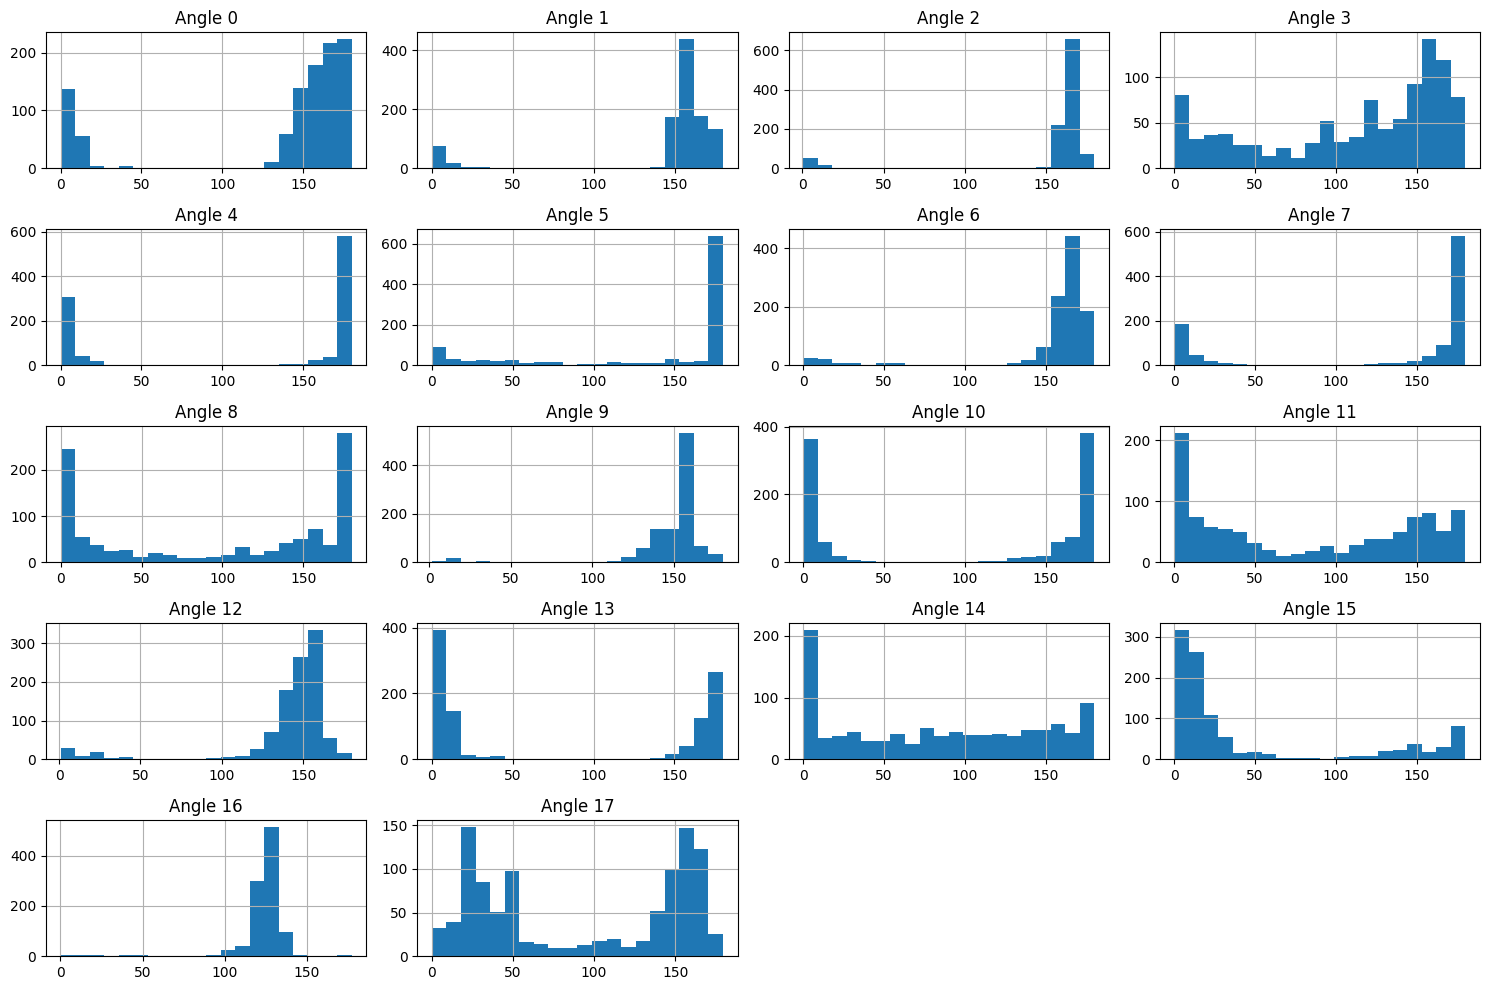

In [71]:
import matplotlib.pyplot as plt

angles_df.drop('Category', axis=1).hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


The above graphs show the distribution of each feature/column.

**Pairplot for Angle Relationships:**

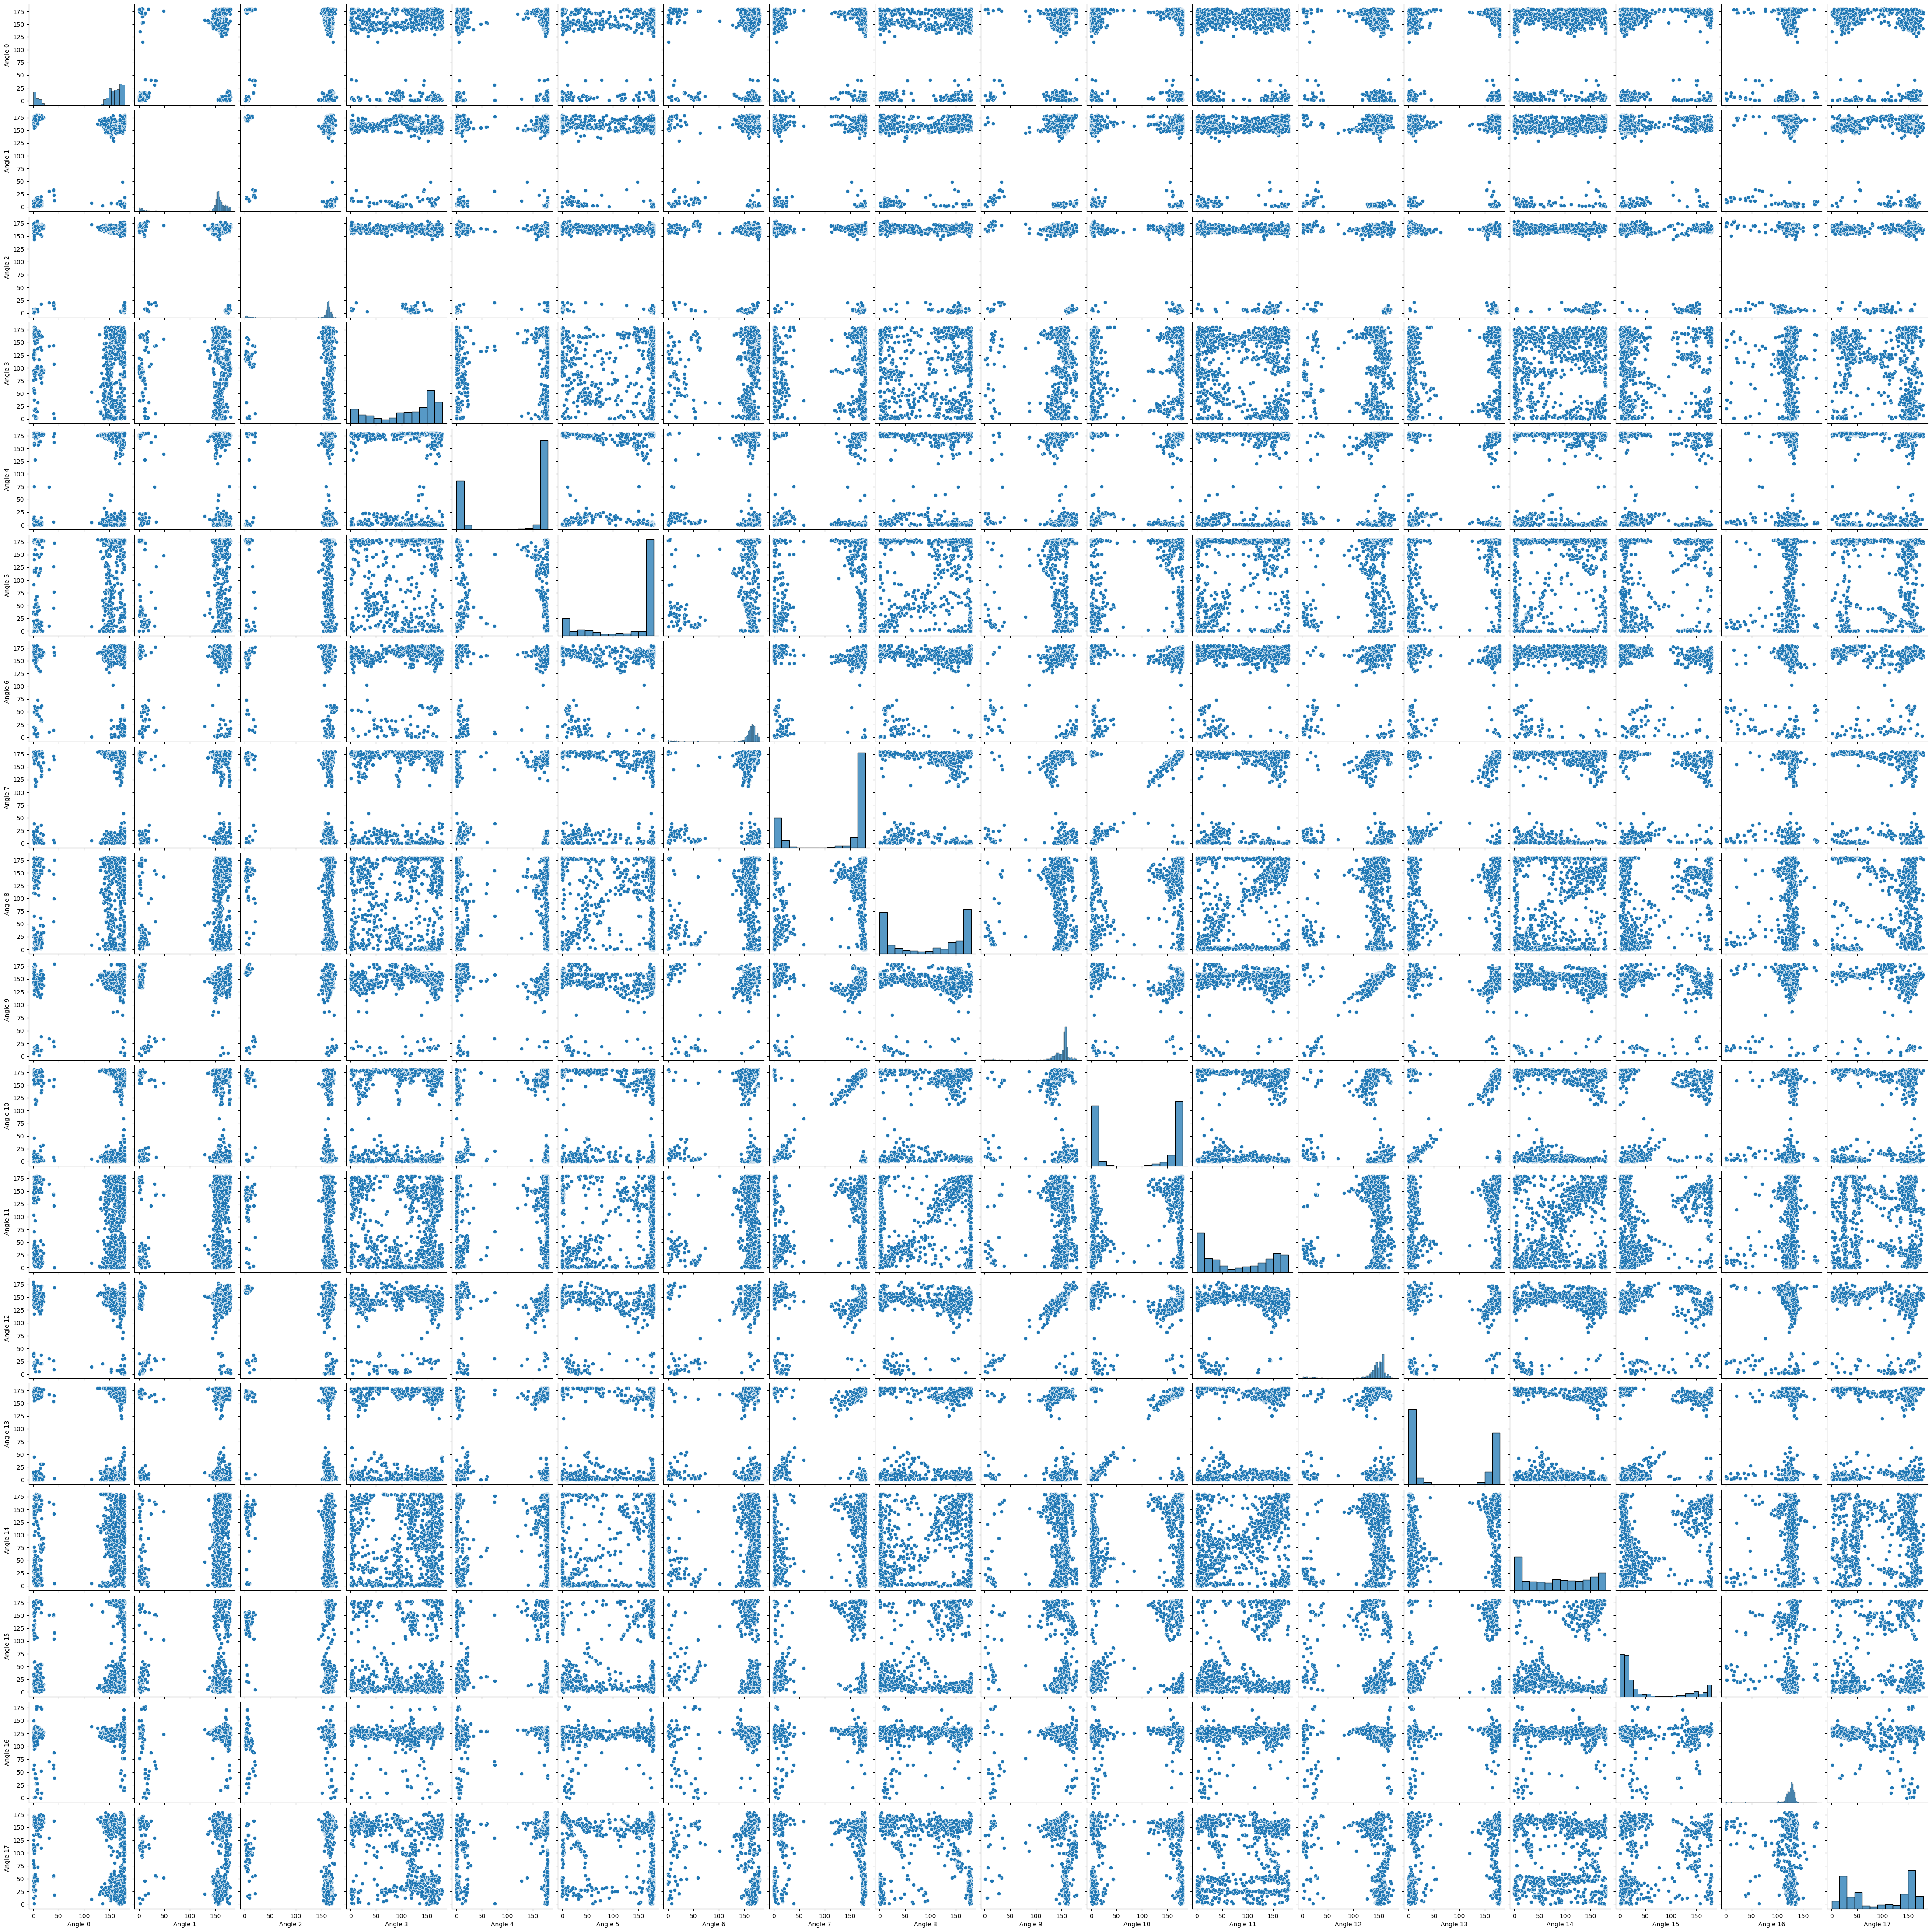

In [47]:
import seaborn as sns

sns.pairplot(angles_df.drop('Category', axis=1))
plt.show()


The above pairplots shows the non-linearity of many features. Off-diagonal plots are the scatter plots of pair of variables. Further these scatter plots show their relationship, such as coorelation, and their spread.

**Boxplot for the Most Important Feature according to the correlation matrix**

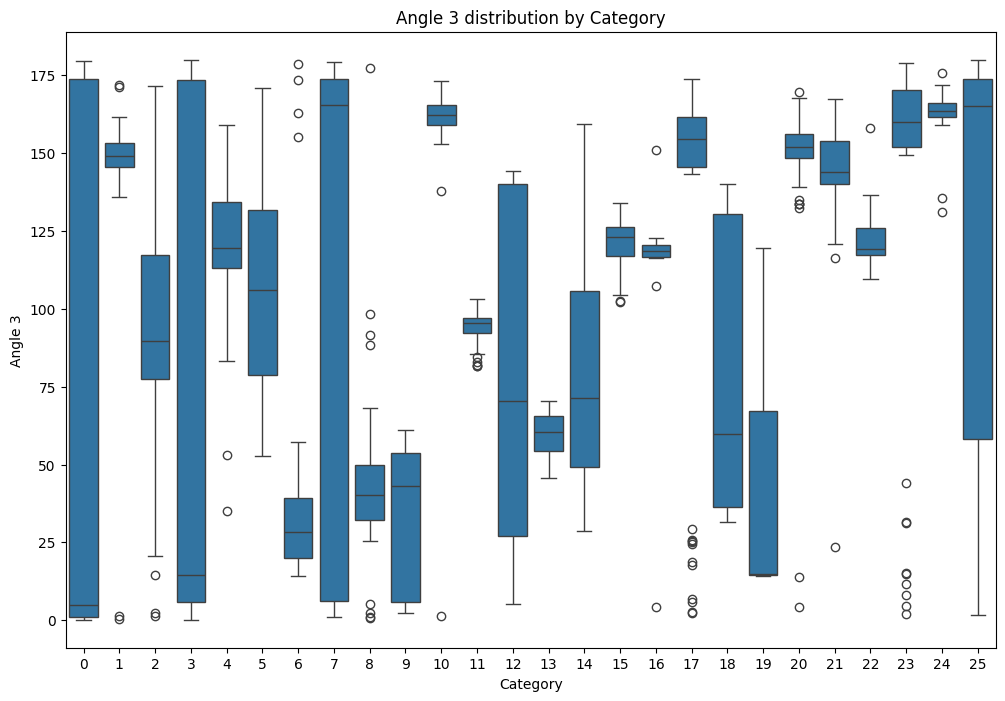

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Angle 3', data=angles_df)
plt.xlabel('Category')
plt.ylabel('Angle 3')
plt.title('Angle 3 distribution by Category')
plt.show()


This above graph shows the median value, range and outliers in this feature.

**Correlation Heatmap**

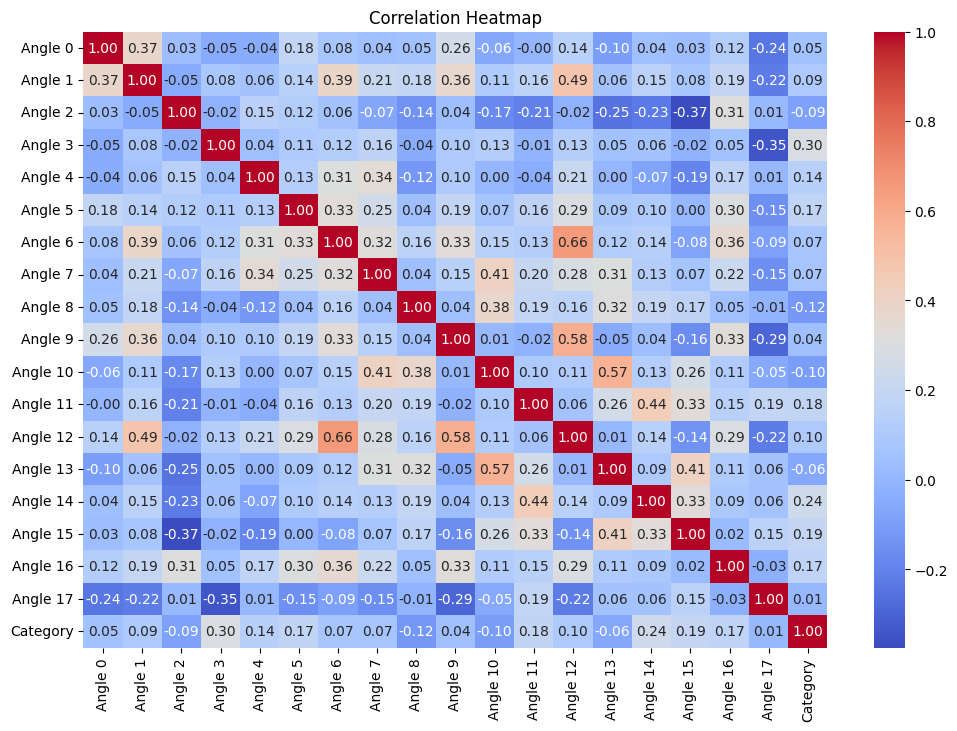

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.show()


This above heatmap is basically showing the coorelation of the features (Angle 0, Angle 1, ... , Angle 17) with the target variable and also showing the correlation of the features between each other. For instance, Angle 12 and Angle 6 have a relationship since they have a high relation value.

**Correlation with the Target Variable:**

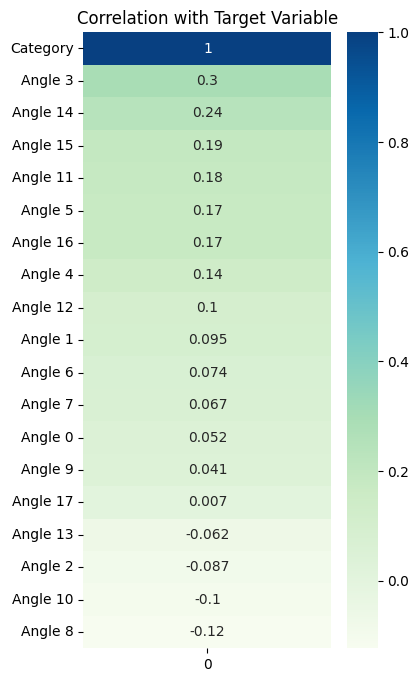

In [36]:
# Create a correlation matrix with target variable
corr_with_target = df.corrwith(df['Category'])

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

This above graph shows the importance of the features with the target variables in decreasing order, where Angle 3 is the strongest predictor in predicitng the target variable.

#### Checking for missing values

In [37]:
# Check for missing values
df.isnull().sum()

Angle 0     0
Angle 1     0
Angle 2     0
Angle 3     0
Angle 4     0
Angle 5     0
Angle 6     0
Angle 7     0
Angle 8     0
Angle 9     0
Angle 10    0
Angle 11    0
Angle 12    0
Angle 13    0
Angle 14    0
Angle 15    0
Angle 16    0
Angle 17    0
Category    0
dtype: int64

In [ ]:
# df.fillna(df.mean(), inplace=True)

#### **Performing Feature Scaling**

In [72]:
from sklearn.preprocessing import MinMaxScaler

# Get the numeric columns except 'Category'
numeric_columns = df.drop('Category', axis=1).select_dtypes(include='number').columns

# Apply MinMaxScaler on the numeric columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

Angle 0   Angle 1   Angle 2   Angle 3   Angle 4   Angle 5   Angle 6  \
0     0.962032  0.922382  0.920004  0.966336  0.154192  0.830569  0.799421   
1     0.968771  0.904261  0.898043  0.992512  0.952624  0.259993  0.853081   
2     0.951461  0.927148  0.906620  0.996800  0.116683  0.981495  0.899706   
3     0.971847  0.937578  0.881778  0.025567  0.998387  0.637310  0.871714   
4     0.935122  0.935382  0.895684  0.133850  0.122144  0.411951  0.883088   
...        ...       ...       ...       ...       ...       ...       ...   
1024  0.835612  0.842857  0.904334  0.915993  0.983752  0.967708  0.892945   
1025  0.883689  0.853128  0.926088  0.925744  0.011641  0.916139  0.875960   
1026  0.795620  0.875024  0.899759  0.048005  0.978585  0.985528  0.904001   
1027  0.819268  0.867036  0.910996  0.993690  0.978074  0.008943  0.926367   
1028  0.849839  0.838519  0.921171  0.884805  0.990323  0.961563  0.906331   

       Angle 7   Angle 8   Angle 9  Angle 10  Angle 11  Angle 12  Angle 13  \
0     0.167318  0.710521  0.730814  0.081220  0.892417  0.716016  0.075809   
1     0.965044  0.790403  0.810532  0.961855  0.972188  0.807264  0.959311   
2     0.177121  0.177417  0.861611  0.207286  0.178253  0.846853  0.203474   
3     0.090354  0.163852  0.848132  0.149634  0.195694  0.839461  0.100521   
4     0.039317  0.808258  0.835512  0.018394  0.798533  0.832954  0.017045   
...        ...       ...       ...       ...       ...       ...       ...   
1024  0.960263  0.062139  0.823884  0.990300  0.017453  0.732986  0.055076   
1025  0.777037  0.840995  0.710287  0.760254  0.863397  0.656150  0.904800   
1026  0.085372  0.300679  0.880949  0.161131  0.239311  0.931504  0.227806   
1027  0.106288  0.355033  0.899940  0.174455  0.255205  0.932654  0.234567   
1028  0.916471  0.031156  0.789476  0.960171  0.003892  0.688592  0.068421   

      Angle 14  Angle 15  Angle 16  Angle 17  Category  
0     0.027466  0.993568  0.809798  0.420177         0  
1     0.985879  0.058261  0.747162  0.845609         0  
2     0.216113  0.304019  0.708443  0.866994         0  
3     0.247095  0.205833  0.748286  0.828571         0  
4     0.700099  0.093130  0.739639  0.812963         0  
...        ...       ...       ...       ...       ...  
1024  0.162980  0.110245  0.733907  0.903068        25  
1025  0.903207  0.946644  0.742014  0.873580        25  
1026  0.347521  0.269475  0.737855  0.954867        25  
1027  0.368502  0.287947  0.714253  0.973213        25  
1028  0.118522  0.155737  0.731595  0.908428        25  

[1029 rows x 19 columns]

#### Splitting the data with 80:20 ratio

In [73]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
# selected_columns = ['Angle 0', 'Angle 1', 'Angle 4', 'Angle 5', 'Angle 6', 'Angle 7', 'Angle 9', 'Angle 11', 'Angle 12', 'Angle 14', 'Angle 15', 'Angle 16']

X = df.drop('Category', axis=1)
y = df['Category']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (823, 18)
X_test shape: (206, 18)
y_train shape: (823,)
y_test shape: (206,)


### **Step 4: Training and Evaluating multiple classifiers**
- Random Forest
- KNN
- Decision Tree

#### 1. Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Display the results
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:")
print(classification_report_rf)

Random Forest Classifier:
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00        16
           2       0.73      0.80      0.76        10
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       0.94      1.00      0.97        15
           6       1.00      0.91      0.95        11
           7       0.93      1.00      0.97        14
           8       0.82      1.00      0.90         9
           9       1.00      0.40      0.57         5
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        17
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         3
          14       0.67      0.50      0.57         4
          15       1.00      1.00      1.00        11
          16     

d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest was a fit choice and it performed very well on our dataset with an accuracy of 94%. Random forest helps in reducing overfitting and improves generalization. Further, random forest also handles outliers and noisy data. Random Forest can also handle high-dimensional data.

In [42]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


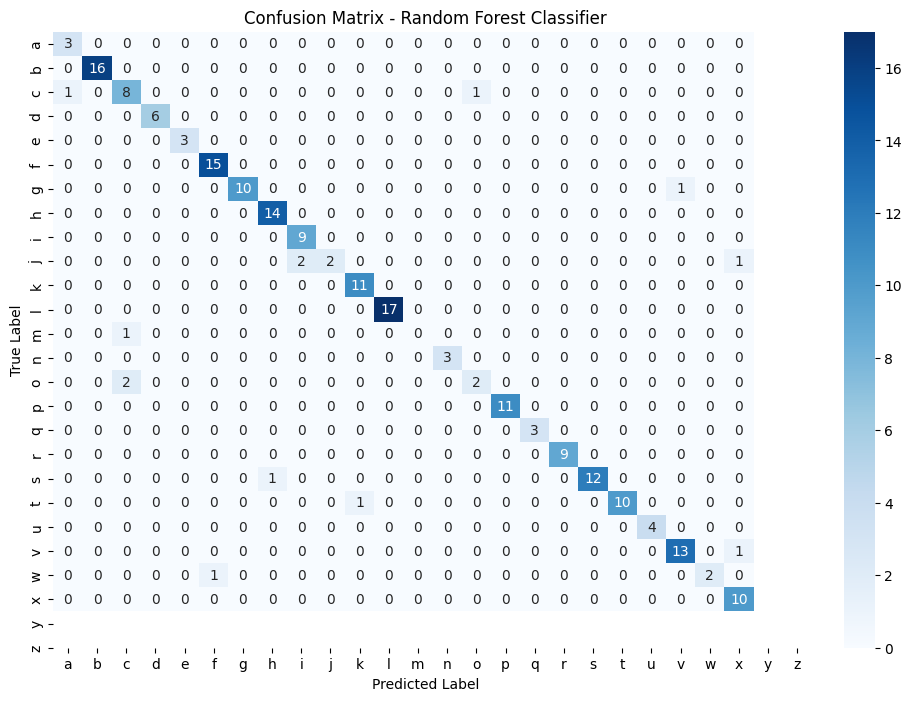

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=asl_categories, yticklabels=asl_categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

#### 2. Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

# Display the results
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report:")
print(classification_report_dt)


Decision Tree Classifier:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.94      0.97        16
           2       0.89      0.80      0.84        10
           3       0.83      0.83      0.83         6
           4       1.00      1.00      1.00         3
           5       0.93      0.93      0.93        15
           6       0.89      0.73      0.80        11
           7       1.00      0.93      0.96        14
           8       0.89      0.89      0.89         9
           9       0.75      0.60      0.67         5
          10       0.92      1.00      0.96        11
          11       0.94      0.94      0.94        17
          12       0.00      0.00      0.00         1
          13       1.00      0.33      0.50         3
          14       0.00      0.00      0.00         4
          15       1.00      1.00      1.00        11
          16     

d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Trees are sensitive to data changes. Small changes in the dataset can lead to different splits in the tree. Decision Trees might not generalize to unseen data, especially when they are complex as angles between points on a hand. However, decision tree was able to give 87% accuracy. 

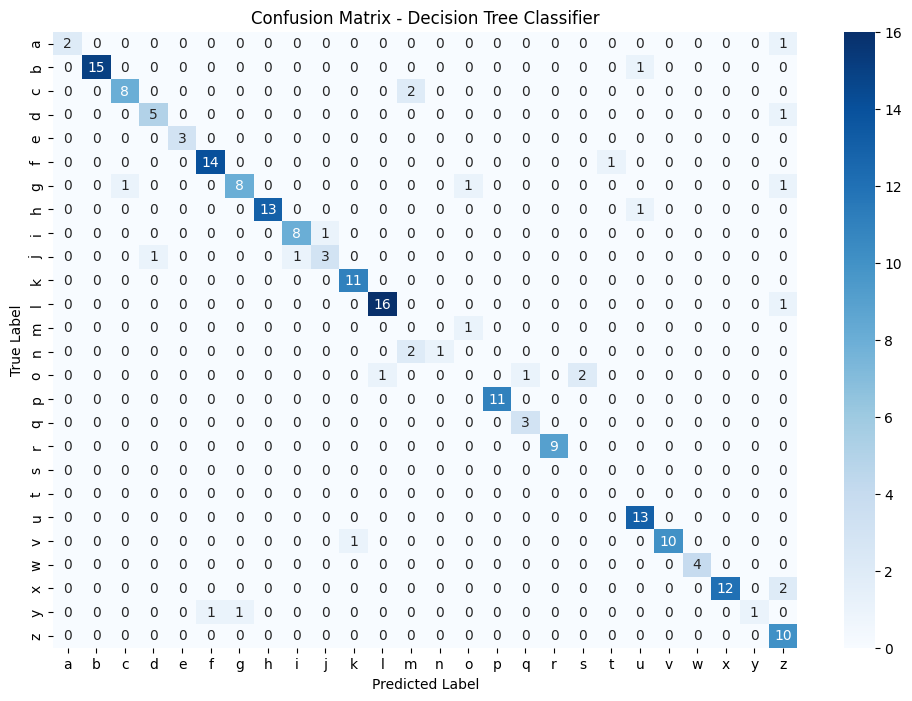

In [77]:
# Generate and display the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=asl_categories, yticklabels=asl_categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


#### 3. KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KNN classifier (you can specify the number of neighbors with the n_neighbors parameter)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

# Display the results
print("K-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(classification_report_knn)

K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.75      0.71        16
           2       0.88      0.70      0.78        10
           3       0.42      0.83      0.56         6
           4       0.33      0.33      0.33         3
           5       0.80      0.80      0.80        15
           6       0.82      0.82      0.82        11
           7       0.89      0.57      0.70        14
           8       0.56      0.56      0.56         9
           9       1.00      0.40      0.57         5
          10       0.64      0.82      0.72        11
          11       0.94      0.94      0.94        17
          12       0.00      0.00      0.00         1
          13       1.00      0.67      0.80         3
          14       0.40      0.50      0.44         4
          15       1.00      1.00      1.00        11
     

d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\PythonI\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


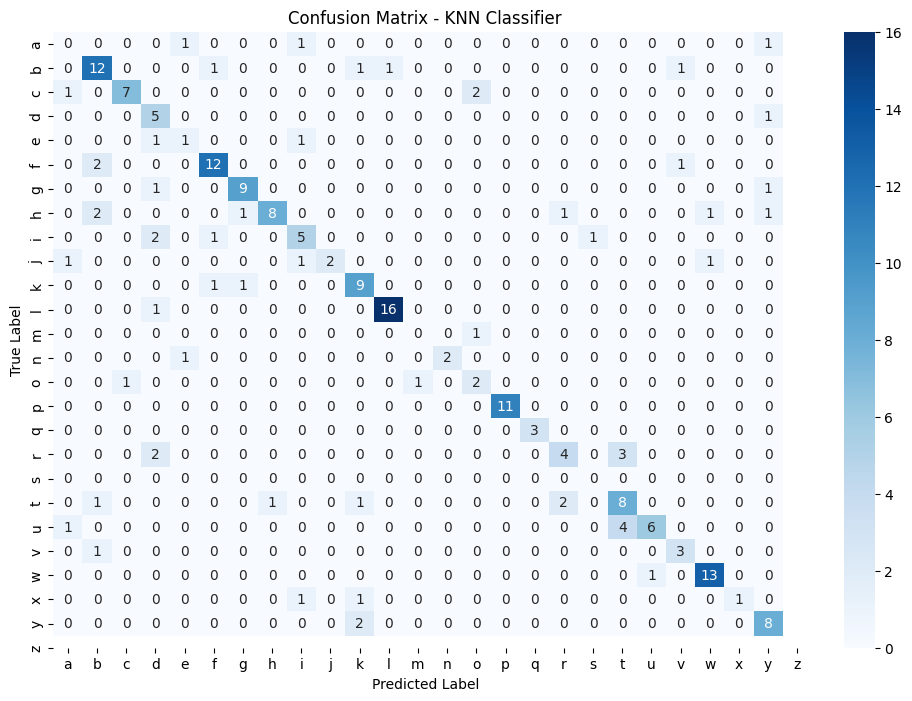

In [79]:
# Generate and display the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=asl_categories, yticklabels=asl_categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

### **Saving all three models' file**

In [50]:
%pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
from joblib import dump

# Save the model to a file
dump(rf_classifier, 'rf_classifier.pkl')
dump(dt_classifier, 'dt_classifier.pkl')
dump(knn_classifier, 'knn_classifier.pkl')
dump(scaler, 'scaler.pkl')

['scaler.pkl']

The model with the best accuracy and performance can be seen from the above classification reports and the confusion matrix is Random Forest Classifier with the accuracy of 94%. 